In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
file_path = "/home/huzr/pisa2015_science/pisa2015_science/cog_science.csv"
df = pd.read_csv(file_path, low_memory=False)

# Data Description

Field | annotation
----- | -----
CNTRYID 	| The country which the student comes from
CNTSTUID	| Student ID
Region		| The region which the student comes from
STRATUM		| Types of students classified by school and place of birth, etc.
SUBNATIO	| Further division of country
ADMINMODE	| The means by which the student answer questions(paper or computer)
LANGTEST_COG| The language which the student uses
BOOKID		| Form ID
CBASCI		| Science Cluster Combination Random Number(S)
CS601Q01S, CS601Q02S ... DS626Q04C | Question ID

# Record Examples

In [3]:
df.head()

,CNTRYID,CNTSTUID,Region,STRATUM,SUBNATIO,ADMINMODE,LANGTEST_COG,BOOKID,CBASCI,DS269Q01C,...,CS601Q01S,CS601Q02S,CS601Q04S,DS610Q01C,CS610Q02S,CS610Q04S,CS626Q01S,CS626Q02S,CS626Q03S,DS626Q04C
0,Albania,803627,Albania,ALB - stratum 05: Urban \ South \ Public,Albania,Paper,Albanian,Form 27 (PBA),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,800454,Albania,ALB - stratum 05: Urban \ South \ Public,Albania,Paper,Albanian,Form 9 (PBA),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,800893,Albania,ALB - stratum 05: Urban \ South \ Public,Albania,Paper,Albanian,Form 18 (PBA),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,804180,Albania,ALB - stratum 05: Urban \ South \ Public,Albania,Paper,Albanian,Form 10 (PBA),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,800491,Albania,ALB - stratum 05: Urban \ South \ Public,Albania,Paper,Albanian,Form 19 (PBA),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("{} Students from {} regions around the world participate in this assessment.".format(len(df['CNTSTUID']), len(df['Region'].unique())))

519334 Students from 118 regions around the world participate in this assessment.


The columns begin with "DS" or "CS" are the questions.

In [5]:
question_ids = [col for col in df.columns if 'DS' in col or 'CS' in col]
print("There are {} questions involved.".format(len(question_ids)))

There are 183 questions involved.


# Data cleaning


## Drop useless columns

In [6]:
useless_columns = ["CBASCI", "BOOKID", "ADMINMODE", "SUBNATIO", "LANGTEST_COG"]
df.drop(columns=useless_columns, inplace=True)
df.head()

,CNTRYID,CNTSTUID,Region,STRATUM,DS269Q01C,DS269Q03C,CS269Q04S,CS408Q01S,DS408Q03C,CS408Q04S,...,CS601Q01S,CS601Q02S,CS601Q04S,DS610Q01C,CS610Q02S,CS610Q04S,CS626Q01S,CS626Q02S,CS626Q03S,DS626Q04C
0,Albania,803627,Albania,ALB - stratum 05: Urban \ South \ Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,800454,Albania,ALB - stratum 05: Urban \ South \ Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,800893,Albania,ALB - stratum 05: Urban \ South \ Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,804180,Albania,ALB - stratum 05: Urban \ South \ Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,800491,Albania,ALB - stratum 05: Urban \ South \ Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transform the result to score

In [7]:
def transform_to_number(ans):
    if isinstance(ans, float):
        return np.NaN
    if 'No credit' in ans:
        return 0
    if 'Partial credit' in ans:
        return 1
    if 'Full credit' in ans:
        return 2
    if 'No Response' in ans:
        return np.NaN
    if 'Not Reached' in ans:
        return np.NaN
    if 'Not Applicable' in ans:
        return np.NaN
    
    return np.NaN

for q in question_ids:

    df[q] = df[q].map(transform_to_number)
    
df_question = df[question_ids]


In [8]:
df_difficulty = df_question.transpose().mean(1) / 2
# define difficulty equals average score divided by full score(2)
df_question = df_question / df_difficulty
# The more difficult questions will bring more score

In [9]:
print("5 least answered questions:")
df_question.count().nsmallest()

5 least answered questions:


DS327Q02C        0
DS438Q03C    38225
DS425Q04C    39228
DS524Q07C    39777
DS268Q02C    39958
dtype: int64

The question "DS327Q02C" is bad, because no one has given the correct answer.

In [10]:
df_question.drop(columns=['DS327Q02C'], inplace=True)
print("The number of students who answer each question:")
df_question.count()

The number of students who answer each question:


DS269Q01C    44197
DS269Q03C    43324
CS269Q04S    48415
CS408Q01S    48440
DS408Q03C    42613
             ...  
CS610Q04S    91081
CS626Q01S    92980
CS626Q02S    91846
CS626Q03S    91033
DS626Q04C    89762
Length: 182, dtype: int64

## Calculate average score for each student

In [11]:
df_student = df.copy()
df_student['Avg score'] = df_question.mean(1)
df_student['Question count'] = df_question.count(1)
df_student.drop(columns=question_ids, inplace=True)
df_student.drop(df_student[df_student['Question count'] == 0].index, inplace=True)

In [12]:
print("{} students give at least one valid answer.".format(len(df_student)))

446051 students give at least one valid answer.


In [13]:
df_student.head()

,CNTRYID,CNTSTUID,Region,STRATUM,Avg score,Question count
10734,Australia,3610676,Australia,"AUS - stratum 21: QLD-Gov, Y10",2.945319,19
10735,Australia,3611874,Australia,"AUS - stratum 21: QLD-Gov, Y10",2.693977,27
10736,Australia,3601769,Australia,"AUS - stratum 21: QLD-Gov, Y10",2.982012,23
10737,Australia,3605996,Australia,"AUS - stratum 21: QLD-Gov, Y10",2.330750,32
10738,Australia,3608147,Australia,"AUS - stratum 21: QLD-Gov, Y10",1.752320,32


# Sort questions by average score

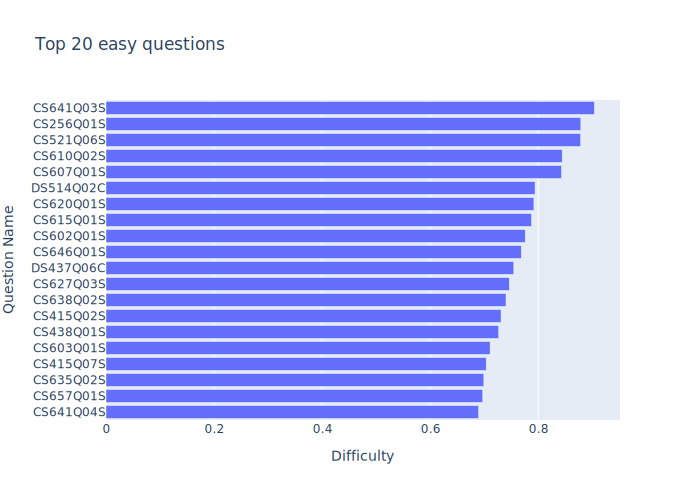

In [27]:
q_top20 = df_difficulty.nlargest(20)
fig = px.bar(
    q_top20.iloc[::-1], 
    labels={"value": "Difficulty", "index": "Question Name"},
    orientation='h',
    title="Top 20 easy questions"
            )
fig.update_layout(showlegend=False)
fig.show('svg')

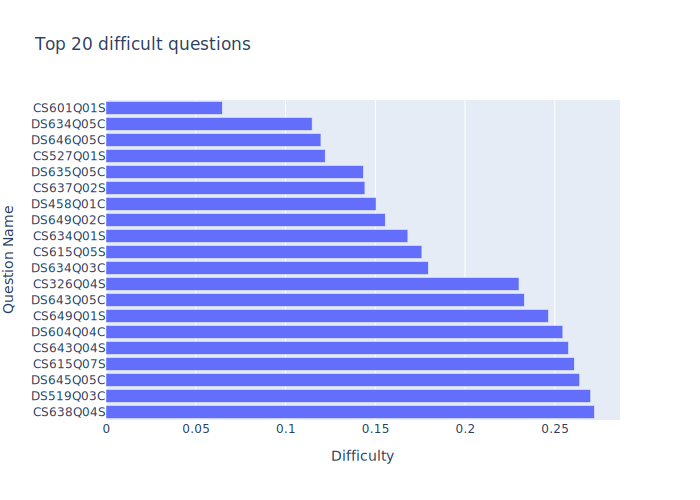

In [14]:
q_bottom20 = df_difficulty.nsmallest(20)
fig = px.bar(
    q_bottom20.iloc[::-1], 
    labels={"value": "Difficulty", "index": "Question Name"},
    orientation='h',
    title="Top 20 difficult questions"
)
fig.update_layout(showlegend=False)
fig.show('svg')

# Sort regions by average score

In [15]:
df_region = \
    df_student[["Region", "Avg score", "Question count"]] \
        .groupby("Region").mean().rename(columns={"Avg score": "Region avg score"})

In [16]:
df_region.describe()

,Region avg score,Question count
count,103.000000,103.000000
mean,1.988160,29.004939
std,0.397446,1.280883
min,0.822475,22.413025
25%,1.782955,28.684978
50%,2.119420,29.295016
75%,2.259783,29.780795
max,2.635470,30.473813


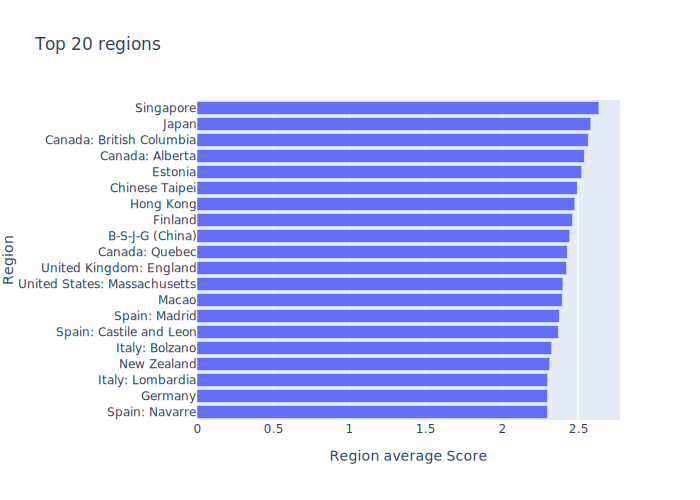

In [17]:
region_top20 = df_region["Region avg score"].nlargest(20)
fig = px.bar(
    region_top20.iloc[::-1],
    labels={"value": "Region average Score", "index": "Region"},
    orientation='h',
    title="Top 20 regions"
)
fig.update_layout(showlegend=False)
fig.show("svg")

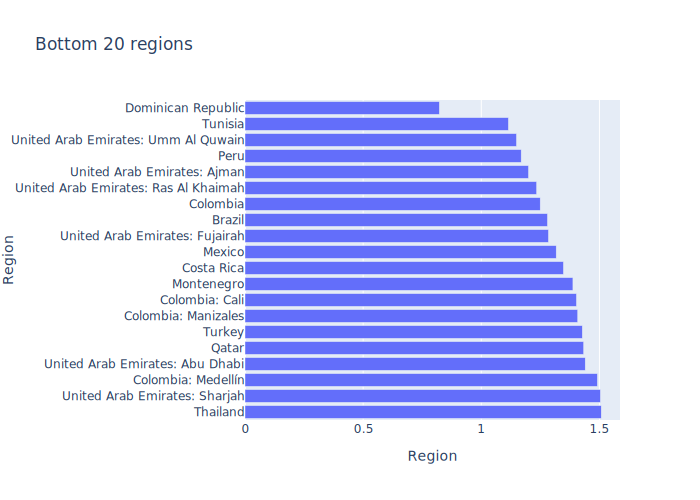

In [18]:
region_bottom20 = df_region["Region avg score"].nsmallest(20)
fig = px.bar(
    region_bottom20.iloc[::-1],
    labels={"index": "Region", "value": "Region"},
    orientation="h",
    title="Bottom 20 regions"
)
fig.update_layout(showlegend=False)
fig.show("svg")

# The distrbution of scores

In [19]:
df_student.describe()

,CNTSTUID,Avg score,Question count
count,4.460510e+05,446051.000000,446051.000000
mean,4.689134e+07,1.955394,28.581337
std,3.016672e+07,1.059917,5.101046
min,3.600001e+06,0.000000,1.000000
25%,1.880574e+07,1.101785,26.000000
50%,4.400022e+07,1.816121,29.000000
75%,7.520527e+07,2.694062,33.000000
max,9.731129e+07,8.116385,55.000000


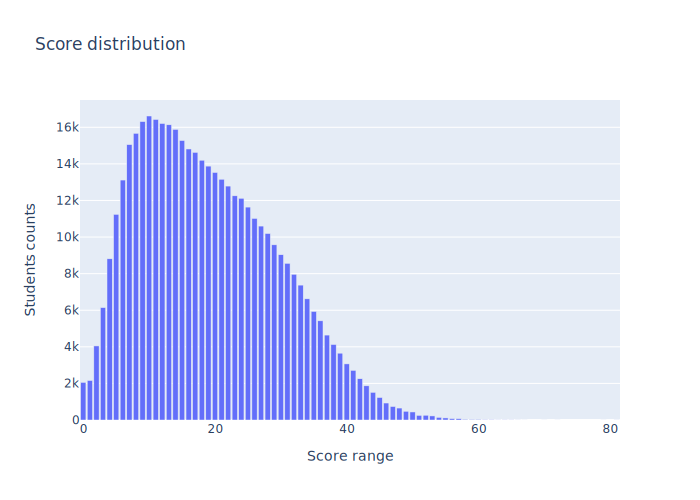

Avg score
0     2055
1     2159
2     4048
3     6144
4     8811
      ... 
67       1
70       1
72       1
79       1
81       3
Name: Avg score, Length: 72, dtype: int64

In [21]:
def level(score):
    return int(score * 10)

df_student_level = df_student["Avg score"].apply(level)
df_student_level_dist = df_student_level.groupby(df_student_level).size()
fig = px.bar(
    df_student_level_dist,
    labels={"value": "Students counts", "index": "Score range"},
    title="Score distribution",
    hover_data={
        "variable":False,
    }
)
fig.update_layout(showlegend=False)
fig.show('svg')

df_student_level_dist


# Sort students by average score

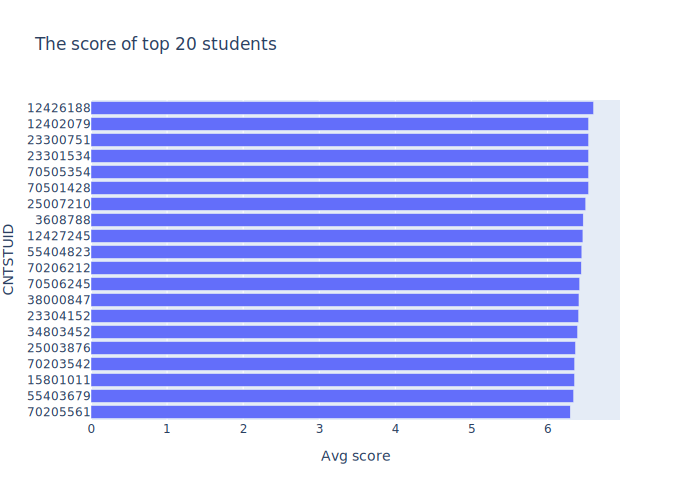

In [22]:
df_student["CNTSTUID"] = df_student["CNTSTUID"].apply(str)
s_top500 = \
    df_student[df_student["Question count"] >= 10] \
        .nlargest(500, ["Avg score"]).set_index("CNTSTUID")
# We only select students who have answered more than 10 questions
s_top500.index = s_top500.index.map(str)
fig = px.bar(
    s_top500[:20].iloc[::-1],
    x = "Avg score",
    orientation="h",
    title="The score of top 20 students"
)
fig.update_layout(yaxis_type='category')
fig.update_layout(showlegend=False)
fig.show('svg')



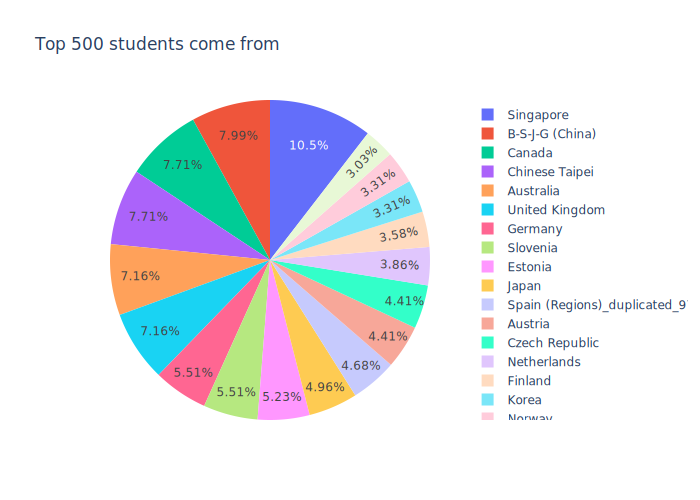

In [24]:
s_top500_dist = s_top500.groupby("CNTRYID").size()
s_top500_dist = s_top500_dist[s_top500_dist > 10]
fig = px.pie(
    values=s_top500_dist,
    names=s_top500_dist.index,
    title="Top 500 students come from"
)
fig.show('svg')

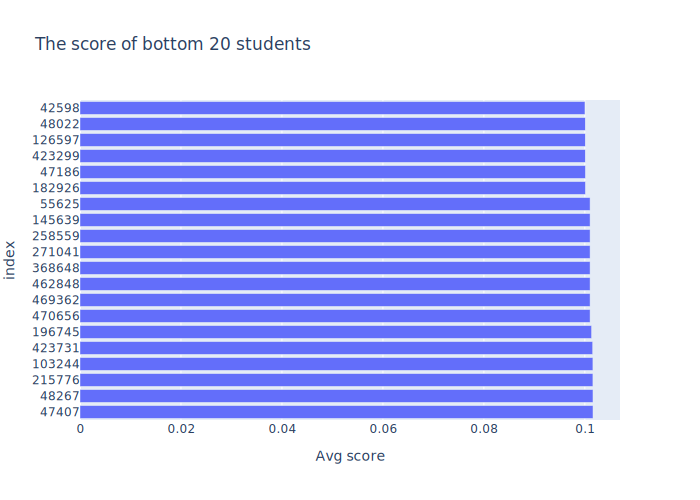

In [25]:
s_bottom500 = df_student[(df_student["Question count"] > 10) & (df_student["Avg score"] > 0.1)]\
    .nsmallest(500, "Avg score")
# A too low score indicates that the student may answer questions blindly
s_bottom500.set_index("CNTSTUID")
s_bottom500.index = s_bottom500.index.map(str)
fig = px.bar(
    s_bottom500.iloc[:20].iloc[::-1],
    x = "Avg score",
    orientation="h",
    title="The score of bottom 20 students"
)
fig.update_layout(yaxis_type='category')
fig.show('svg')

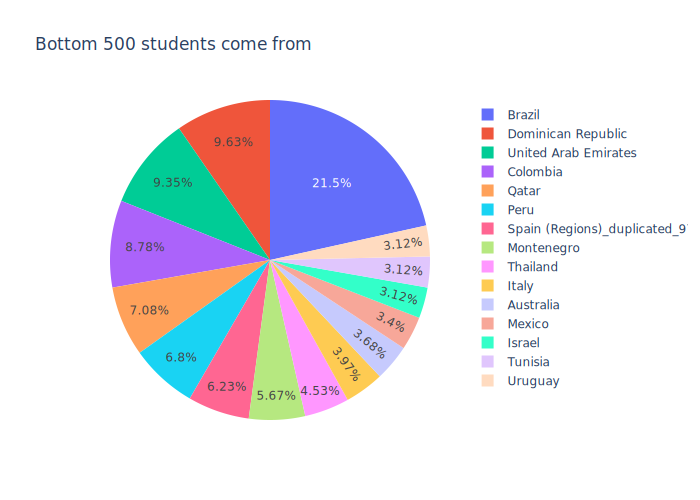

In [26]:
s_bottom500_dist = s_bottom500.groupby("CNTRYID").size()
s_bottom500_dist = s_bottom500_dist[s_bottom500_dist > 10]
fig = px.pie(
    names=s_bottom500_dist.index,
    values=s_bottom500_dist,
    title="Bottom 500 students come from",
)
fig.show('svg')